# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Faorlin

Student name: Tommaso
    
ID: 2021857

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.23.1


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2021857
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [61 67 45 68 61 53 70 66 54 55]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [61 67 45 68 61 53 70 66 54 55]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


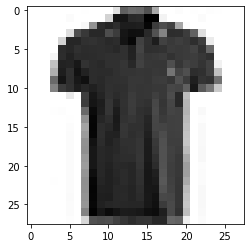

LABEL: 0
INPUT:


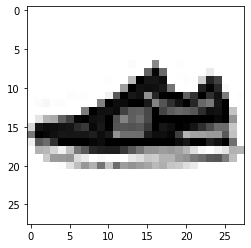

LABEL: 7
INPUT:


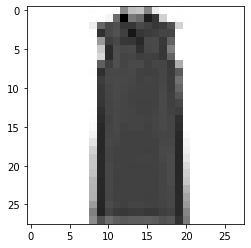

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
#I removed some of the original ones, I tried to enlarge the architecture and with 50 neurons in a layer I have the best result.
parameters = {'hidden_layer_sizes': [(40,), (50,), (60,),
                                     (70,),(80,),(90,),(90,90,),(100,100,)]}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

gsearch_mlp = GridSearchCV(mlp, parameters, cv = 5)
gsearch_mlp.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(gsearch_mlp.best_params_)

print("Score with best parameters:")
print(gsearch_mlp.best_score_)

print("\nAll scores on the grid:")
print(gsearch_mlp.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (90,)}
Score with best parameters:
0.7866666666666667

All scores on the grid:
[0.77833333 0.78       0.77666667 0.78333333 0.78333333 0.78666667
 0.685      0.775     ]


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!

#the best architecture is [(90,)]
parameters = {'batch_size': [x * 20 for x in range(1,25)], 'hidden_layer_sizes': [(90,) ]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits = 5)

gsearch_mlp = GridSearchCV(mlp, parameters, cv = kf)
gsearch_mlp.fit(X_train, y_train)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(gsearch_mlp.best_params_)

print("Score with best parameters:")
print(gsearch_mlp.best_score_)

print("\nAll scores on the grid:")
print(gsearch_mlp.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'batch_size': 220, 'hidden_layer_sizes': (90,)}
Score with best parameters:
0.7933333333333333

All scores on the grid:
[0.65       0.78333333 0.78166667 0.775      0.78666667 0.79166667
 0.78333333 0.79       0.77833333 0.78       0.79333333 0.78166667
 0.78166667 0.785      0.78666667 0.78       0.78833333 0.78
 0.78333333 0.775      0.77833333 0.78166667 0.77       0.78333333]


### QUESTION 1
What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]
I tried several nn architectures and batch sizes. What I found is that increasing the network architecture (in depth) I obtain in general worse results. The thing that surprised me most is that I obtain the best result with (90,) i.e. a single-hidden-layer of 90 neurons network but when I just add a layer next to that one (composed of 1 or more neurons) I obtain a worse result.

Talking about batch sizes instead, what I found is that it is necessary to tune it correctly because either with too small or too large batch sizes one can obtain bad result, when the best result is just in the middle (In my case the ideal batch size is around 220). I am not observing non-convergence for some batch sizes.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (2,) ...
Done, training time: 0.42 sec

Training MLP of size (10,) ...
Done, training time: 0.37 sec

Training MLP of size (20,) ...
Done, training time: 0.84 sec

Training MLP of size (30,) ...
Done, training time: 0.88 sec

Training MLP of size (30, 20) ...
Done, training time: 0.79 sec

Training MLP of size (30, 30, 20) ...
Done, training time: 0.56 sec

Training MLP of size (90,) ...
Done, training time: 1.44 sec

Training MLP of size (100, 100) ...
Done, training time: 1.38 sec



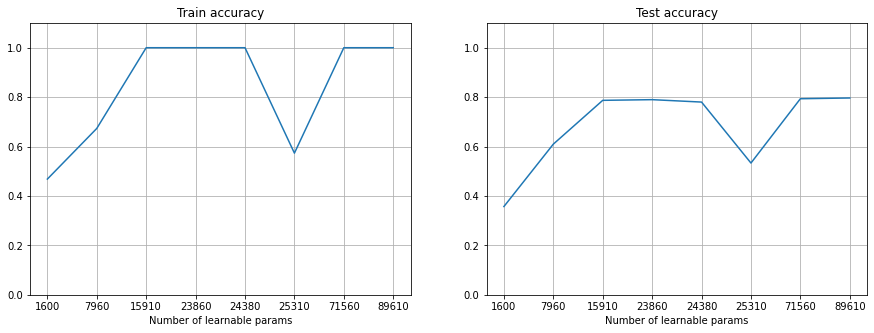

In [16]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(2,),(10,), (20,), (30,), (30,20,), (30,30,20),(90,),(100,100,)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1, hidden_layer_sizes=hl_size)
    
    mlp.fit(X_train,y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_ylim(0,1.1)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_ylim(0,1.1)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


In [15]:

test_acc_list

[0.60975, 0.787, 0.78975, 0.78, 0.53325, 0.7935, 0.7965]

## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]
The training set is overfitted also with simple NN architectures and this could be due to the fact that we are not considering large training sets. Another observation is that with more expressive NN, i.e. with a higher number of parameters, the test accuracy tends to increase slightly on average, beside in some cases that drops. So it is not said in general that a bigger NN leads always to a better test accuracy (recalling also the Occam's Razor). 

I observe underfitting with very very basic NN architectures, such for example a model made of just one layer with two neurons (2,). 


### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

In [20]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.001, 0.01, 0.1]
parameters = {'learning_rate_init': lr_list}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1, batch_size=220, hidden_layer_sizes=(90,))


kf = sklearn.model_selection.KFold(n_splits=5)

clf_mlp = GridSearchCV(mlp, parameters, cv=kf)
clf_mlp.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(clf_mlp.best_params_)

print("Score with best parameters:")
print(clf_mlp.best_score_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: C

RESULTS FOR NN

Best parameters set found:
{'learning_rate_init': 0.1}
Score with best parameters:
0.7933333333333333


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


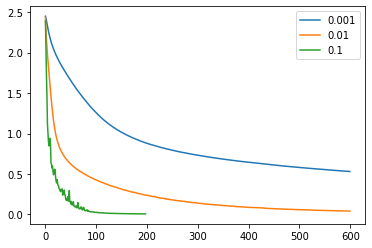

In [21]:
for ilr in lr_list:
    mlp = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        batch_size=480, hidden_layer_sizes=(20,), learning_rate_init=ilr)
    mlp.fit(X_train, y_train)

    plt.plot(mlp.loss_curve_, label=str(ilr))

plt.legend()

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]
The curve for the learning rate equal to 0.1 is clearly the best among the three because it is the quickest in reaching its asymptotic value and it is the only one that converges. An increase in the learning rate leads to 'higher' curve that are not converging within the range of iterations we are looking at (that is also not the standard one, but 600). Maybe they will converge later on.

With my best learning rate I also notice that the curve is a little bit noisier with respect to the other ones. This is due to the fact that with a small amount of data I can choose an high learning rate, the gradient will make huge steps toward the minimum but at the end will end up in it. Maybe a learning rate of 0.1 in other cases will lead to problems.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.211500


Text(0, 0.5, 'loss')

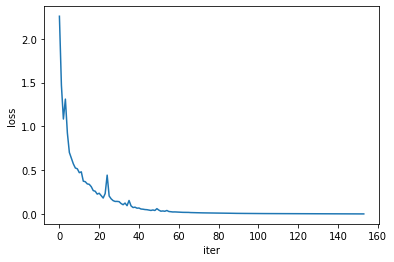

In [22]:
#get training and test error for the best NN model from CV

mlp_best = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd',
                         tol=1e-4, random_state=ID,
                         batch_size=220,
                         hidden_layer_sizes=(90,),
                         learning_rate_init=0.1)
mlp_best.fit(X_train, y_train)

training_error = 1. - mlp_best.score(X_train, y_train)
test_error = 1. - mlp_best.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

#ADD YOUR CODE FOR PLOTTING

plt.plot(mlp_best.loss_curve_)
plt.xlabel('iter')
plt.ylabel('loss')

#here of course I am not getting the convergence error since this model converges in less than 160 steps

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [23]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [395 388 384 402 376 421 424 422 393 395]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.153357


Text(0, 0.5, 'loss')

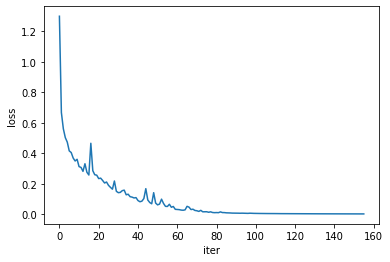

In [24]:
# use best architecture and params from before

mlp_large = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                         tol=1e-4, random_state=ID,
                         batch_size=220,
                         hidden_layer_sizes=(90,),
                         learning_rate_init=0.1)
mlp_large.fit(X_train, y_train)

training_error = 1. - mlp_large.score(X_train, y_train)
test_error = 1. - mlp_large.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp_large.loss_curve_)
plt.xlabel('iter')
plt.ylabel('loss')

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]
  
In both cases I obtain a null training error, and this could be related to an overfitting, but the test error is small in both cases. Is even smaller for the larger dataset, meaning that the predictor found describes better the test set. The predictor in fact is trained on a larger amount of data and so it is better optimized. The model is working well.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


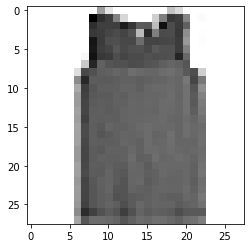

LABEL: 0
Index: 4
NN prediction: 6
Large NN prediction: 0


In [25]:
NN_prediction =  mlp_best.predict(X_test)
large_NN_prediction = mlp_large.predict(X_test)

index = []
for i in range(len(y_test)):
    if NN_prediction[i] != y_test[i] and large_NN_prediction[i] == y_test[i]: index.append(i)

plot_input(X_test,y_test,index[0])
print("Index:", index[0])
print("NN prediction:", NN_prediction[index[0]])
print("Large NN prediction:", large_NN_prediction[index[0]])

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


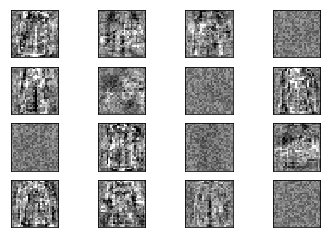

Weights with 4000 data points:


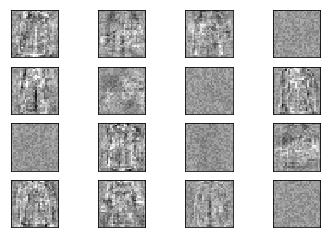

In [26]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.



##### [ANSWER TO QUESTION 5]
In both cases I can associate network weights to images.
I see in general noisy images but it is possible to distinguish a pattern, that is clearer in the case of 4000 samples. In this case in fact, with a large training set weights are better determined and less sensible to fluctuations. 

I was convinced that weights that contains only noise were unuseful but this is not true, they SEEMS unuseful, but in fact they contain important informations for the classification. The point is that we are not able to see that information.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [27]:
#I set 4000 since I used this number also with NN
m_training = 4000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

#run SVM with rbf kernel
rbf = SVC(kernel = 'rbf', C = 5, gamma = 0.005)
rbf.fit(X_train, y_train)

print ('RESULTS FOR SVM')

SVM_training_error =  1 - rbf.score(X_train,y_train)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error =  1 - rbf.score(X_test,y_test)
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.0655
Test score SVM:
0.14475000000000005


In [29]:
from sklearn import linear_model

LinReg = linear_model.LogisticRegression(C = 1, max_iter = 400)
LinReg.fit(X_train, y_train) 

prediction_training = LinReg.predict(X_train)
prediction_test = LinReg.predict(X_test)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error =  1 - LinReg.score(X_train, y_train)
test_error = 1 - LinReg.score(X_test, y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.034000
Test error (reg): 0.175750


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

##### LOGISTIC REGRESSION ($m=$4000)
Train error = 0.034
Test error = 0.17575
##### SVM (rbf) ($m=$4000)
Train error = 0.0655
Test error = 0.14475
##### NN ($m=$4000)
Train error = 0.00000
Test error = 0.153357
##### NN ($m=$600)
Train error = 0.00000
Test error = 0.211500

One can observe how test errors for $m=4000$ are more or less the same. If we look at numbers, the smallest test error is achieved by the SVM with the gaussian kernel, but if we want to include also the speed of the algorithm NN are faster and I will choose a NN approach to tackle this classification. The null training error can be related again to an overfitting in the training set, but the model generalizes well to the test set.